# Airline Customer Satisfaction

> (c) 2021 Travis Lloyd, Isabella Oakes, Lina Nguyen 
>
> An analysis of Airline satisfaction
>


***
**Table of Contents**<br>
>[Data PreProcessing](#preproc)<br>
>[Models](#models)<br>
>[Results](#results)<br>

In [22]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier

from dmba import classificationSummary, gainsChart

from matplotlib.lines import Line2D

%matplotlib inline
DATA = Path('.').resolve().parent / 'data'

In [23]:
df = pd.read_csv('/Users/linanguyen/Desktop/train.csv')
dftest = pd.read_csv('/Users/linanguyen/Desktop/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
dftest.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


<a id="preproc"></a>
<br>
## Data Preprocessing


In [25]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [84]:
df.describe()

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,...,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.230155,1.315416,2.028103,0.433333
std,29994.645522,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,...,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.801103,0.569069,0.962858,0.495538
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,1.000000,1.000000,0.000000
25%,25975.750000,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,51951.500000,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,2.000000,3.000000,1.000000
max,103903.000000,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,3.000000,3.000000,1.000000


In [26]:
dftest.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [85]:
dftest.describe()

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000,25976.000000,25976.000000
mean,12987.500000,65005.657992,39.620958,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,...,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.804242,1.314367,2.035841,0.438982
std,7498.769632,37611.526647,15.135685,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,...,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.741130,0.565919,0.961744,0.496272
min,0.000000,17.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,-5.000000,1.000000,1.000000,0.000000
25%,6493.750000,32170.500000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000
50%,12987.500000,65319.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,1.000000,2.000000,0.000000
75%,19481.250000,97584.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,2.000000,3.000000,1.000000
max,25975.000000,129877.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,3.000000,3.000000,1.000000


In [27]:
df = df.rename(columns={'Customer Type':'customer_type',
                   'Type of Travel':'travel_type',
                   'Flight Distance':'flight_dist',
                   'Inflight wifi service':'wifi_service',
                   'Departure/Arrival time convenient':'time_convenience',
                   'Ease of Online booking':'booking_diff',
                   'Gate location':'gate_loc',
                   'Food and drink':'food_drink',
                   'Online boarding':'online_boarding', 
                   'Seat comfort':'seat_comf',
                   'Inflight entertainment':'inflight_ent', 
                   'On-board service':'onboard_serv', 
                   'Leg room service':'legroom',
                   'Baggage handling':'baggage_care', 
                   'Checkin service':'checkin',
                   'Inflight service':'inflight_serv',
                   'Departure Delay in Minutes':'dept_delay', 
                   'Arrival Delay in Minutes':'arr_delay'
                  })

In [28]:
dftest = dftest.rename(columns={'Customer Type':'customer_type',
                   'Type of Travel':'travel_type',
                   'Flight Distance':'flight_dist',
                   'Inflight wifi service':'wifi_service',
                   'Departure/Arrival time convenient':'time_convenience',
                   'Ease of Online booking':'booking_diff',
                   'Gate location':'gate_loc',
                   'Food and drink':'food_drink',
                   'Online boarding':'online_boarding', 
                   'Seat comfort':'seat_comf',
                   'Inflight entertainment':'inflight_ent', 
                   'On-board service':'onboard_serv', 
                   'Leg room service':'legroom',
                   'Baggage handling':'baggage_care', 
                   'Checkin service':'checkin',
                   'Inflight service':'inflight_serv',
                   'Departure Delay in Minutes':'dept_delay', 
                   'Arrival Delay in Minutes':'arr_delay'
                  })

In [29]:
# Number of unique values
for column in df.columns:
    print(column, df[column].nunique())

Unnamed: 0 103904
id 103904
Gender 2
customer_type 2
Age 75
travel_type 2
Class 3
flight_dist 3802
wifi_service 6
time_convenience 6
booking_diff 6
gate_loc 6
food_drink 6
online_boarding 6
seat_comf 6
inflight_ent 6
onboard_serv 6
legroom 6
baggage_care 5
checkin 6
inflight_serv 6
Cleanliness 6
dept_delay 446
arr_delay 455
satisfaction 2


In [30]:
# Number of unique values
for column in dftest.columns:
    print(column, dftest[column].nunique())

Unnamed: 0 25976
id 25976
Gender 2
customer_type 2
Age 75
travel_type 2
Class 3
flight_dist 3281
wifi_service 6
time_convenience 6
booking_diff 6
gate_loc 5
food_drink 6
online_boarding 6
seat_comf 5
inflight_ent 6
onboard_serv 6
legroom 6
baggage_care 5
checkin 5
inflight_serv 6
Cleanliness 6
dept_delay 313
arr_delay 320
satisfaction 2


In [31]:
# Helper Functions

classes = ('Satisfied', 'Unsatisfied')

def check_na(df):
    if df.isna().sum().sum():
        print ('Missing values detected')
    else:
        print('No Missing Values Detected')

        #Function for printing model evaluation metrics
def stat_print(train_y, pred_cancel):
    print('Recall Score    : ',recall_score(train_y, pred_cancel, average='weighted'))
    print('Accuracy Score  : ',accuracy_score(train_y, pred_cancel))
    print('F1 Score        : ',f1_score(train_y,pred_cancel))
    print('Precision Score : ',precision_score(train_y,pred_cancel))
    
    
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X), class_names=classes)
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred, class_names=classes)

In [32]:
check_na(dftest)

Missing values detected


In [33]:
check_na(df)

Missing values detected


In [34]:
# Checking for na values
df.isna().sum()

Unnamed: 0            0
id                    0
Gender                0
customer_type         0
Age                   0
travel_type           0
Class                 0
flight_dist           0
wifi_service          0
time_convenience      0
booking_diff          0
gate_loc              0
food_drink            0
online_boarding       0
seat_comf             0
inflight_ent          0
onboard_serv          0
legroom               0
baggage_care          0
checkin               0
inflight_serv         0
Cleanliness           0
dept_delay            0
arr_delay           310
satisfaction          0
dtype: int64

In [35]:
dftest.isna().sum()

Unnamed: 0           0
id                   0
Gender               0
customer_type        0
Age                  0
travel_type          0
Class                0
flight_dist          0
wifi_service         0
time_convenience     0
booking_diff         0
gate_loc             0
food_drink           0
online_boarding      0
seat_comf            0
inflight_ent         0
onboard_serv         0
legroom              0
baggage_care         0
checkin              0
inflight_serv        0
Cleanliness          0
dept_delay           0
arr_delay           83
satisfaction         0
dtype: int64

In [36]:
df.sort_values(by='dept_delay', ascending=False)

,Unnamed: 0,id,Gender,customer_type,Age,travel_type,Class,flight_dist,wifi_service,time_convenience,...,inflight_ent,onboard_serv,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,satisfaction
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
72206,72206,78300,Male,Loyal Customer,30,Personal Travel,Eco,1598,1,4,...,5,3,4,4,1,4,1,978,970.0,neutral or dissatisfied
80182,80182,8345,Male,Loyal Customer,47,Business travel,Business,2187,4,5,...,5,4,5,5,4,4,4,933,920.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,44435,95245,Male,Loyal Customer,49,Personal Travel,Eco,189,3,1,...,1,1,3,3,4,4,1,0,0.0,neutral or dissatisfied
44434,44434,58151,Female,Loyal Customer,42,Business travel,Business,3239,5,5,...,4,4,5,4,5,4,4,0,34.0,satisfied
44432,44432,6253,Female,Loyal Customer,8,Personal Travel,Eco,413,2,5,...,5,2,3,4,4,2,5,0,0.0,neutral or dissatisfied
44431,44431,48424,Male,Loyal Customer,47,Business travel,Eco,819,4,2,...,5,1,5,4,5,1,5,0,0.0,satisfied


In [37]:
dftest.sort_values(by = 'dept_delay', ascending = False)

,Unnamed: 0,id,Gender,customer_type,Age,travel_type,Class,flight_dist,wifi_service,time_convenience,...,inflight_ent,onboard_serv,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,satisfaction
17429,17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
1655,1655,63689,Female,Loyal Customer,39,Business travel,Business,1696,1,4,...,2,1,3,3,1,1,1,951,940.0,neutral or dissatisfied
19000,19000,2247,Female,Loyal Customer,42,Business travel,Business,693,2,1,...,2,5,3,3,2,4,2,815,822.0,neutral or dissatisfied
10072,10072,6062,Female,Loyal Customer,45,Personal Travel,Eco,630,1,4,...,3,4,4,5,5,5,5,794,795.0,neutral or dissatisfied
21907,21907,90926,Female,Loyal Customer,24,Business travel,Business,2507,2,5,...,3,1,3,3,2,3,2,756,748.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,11057,31858,Female,Loyal Customer,35,Personal Travel,Eco,2640,2,1,...,5,4,3,2,3,3,5,0,0.0,neutral or dissatisfied
11055,11055,91300,Male,Loyal Customer,55,Business travel,Business,3219,4,4,...,4,4,4,4,5,4,5,0,0.0,satisfied
11048,11048,31996,Female,Loyal Customer,57,Personal Travel,Business,216,3,4,...,5,5,3,5,4,5,4,0,0.0,neutral or dissatisfied
11046,11046,29265,Female,Loyal Customer,27,Business travel,Eco,859,5,3,...,5,4,2,5,1,5,5,0,12.0,satisfied


In [38]:
# Replacing arrival delay missing values based on the departing delay
df['arr_delay'].fillna(value=df['dept_delay'] -5,inplace=True)
dftest['arr_delay'].fillna(value=dftest['dept_delay'] -5,inplace=True)

In [39]:
min_value = df['flight_dist'].min()
max_value = df['flight_dist'].max()
print(min_value)
print(max_value)

31
4983


In [40]:
min_valuetest = dftest['flight_dist'].min()
max_valuetest = dftest['flight_dist'].max()
print(min_valuetest)
print(max_valuetest)

31
4983


In [43]:
# Turning flight length into a binned variable
bins = np.linspace(min_value,max_value,4)
bins.round(2)
bins = np.linspace(min_value,max_value,4)
bins.round(2)

labels = ['short', 'medium', 'long']

In [44]:
# Turning flight length into a binned variable
bins = np.linspace(min_valuetest,max_valuetest,4)
bins.round(2)
bins = np.linspace(min_valuetest,max_valuetest,4)
bins.round(2)
dftest['flight_length'] = pd.cut(dftest['flight_dist'], bins=bins, labels=labels, include_lowest=True)

In [46]:
df['flight_length'] = pd.cut(df['flight_dist'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Frequency')

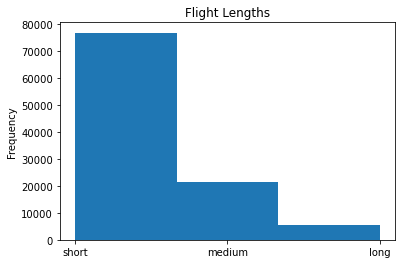

In [47]:
plt.hist(df['flight_length'], bins=3)
plt.title('Flight Lengths')
plt.ylabel('Frequency')

In [48]:
df.head(2)

,Unnamed: 0,id,Gender,customer_type,Age,travel_type,Class,flight_dist,wifi_service,time_convenience,...,onboard_serv,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,satisfaction,flight_length
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,short
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,short


In [49]:
## Creating dummy variable for Gender
# Male:0, Female:1
df.loc[df['Gender'] == 'Male', 'flight_dummy'] = 0
df.loc[df['Gender'] == 'Female', 'flight_dummy'] = 1

## Creating dummy variable for customer type
# disloyal:0, loyal:1
df.loc[df['customer_type'] == 'Loyal Customer', 'flight_dummy'] = 1
df.loc[df['customer_type'] == 'disloyal Customer', 'flight_dummy'] = 0

## Creating dummy variable for travel type
# personal:0, business:1
df.loc[df['travel_type'] == 'Business travel', 'flight_dummy'] = 1
df.loc[df['travel_type'] == 'Personal Travel', 'flight_dummy'] = 0


## Creating dummy variable for flight length
#1:short, 2:medium, 3:long
df.loc[df['flight_length'] == 'short', 'flight_dummy'] = 1
df.loc[df['flight_length'] == 'medium', 'flight_dummy'] = 2
df.loc[df['flight_length'] == 'long', 'flight_dummy'] = 3

## Creating dummy variable for Class
#1:Eco, 2:Eco Plus 3:Business
df.loc[df['Class'] == 'Eco', 'class_dummy'] = 1
df.loc[df['Class'] == 'Eco Plus', 'class_dummy'] = 2
df.loc[df['Class'] == 'Business', 'class_dummy'] = 3


## Creating dummy variable for satisfaction (1 for satisfied)
df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction_dummy'] = 0
df.loc[df['satisfaction'] == 'satisfied', 'satisfaction_dummy'] = 1


In [50]:
## Creating dummy variable for Gender
# Male:0, Female:1
dftest.loc[dftest['Gender'] == 'Male', 'flight_dummy'] = 0
dftest.loc[dftest['Gender'] == 'Female', 'flight_dummy'] = 1

## Creating dummy variable for customer type
# disloyal:0, loyal:1
dftest.loc[dftest['customer_type'] == 'Loyal Customer', 'flight_dummy'] = 1
dftest.loc[dftest['customer_type'] == 'disloyal Customer', 'flight_dummy'] = 0

## Creating dummy variable for travel type
# personal:0, business:1
dftest.loc[dftest['travel_type'] == 'Business travel', 'flight_dummy'] = 1
dftest.loc[dftest['travel_type'] == 'Personal Travel', 'flight_dummy'] = 0


## Creating dummy variable for flight length
#1:short, 2:medium, 3:long
dftest.loc[dftest['flight_length'] == 'short', 'flight_dummy'] = 1
dftest.loc[dftest['flight_length'] == 'medium', 'flight_dummy'] = 2
dftest.loc[dftest['flight_length'] == 'long', 'flight_dummy'] = 3

## Creating dummy variable for Class
#1:Eco, 2:Eco Plus 3:Business
dftest.loc[dftest['Class'] == 'Eco', 'class_dummy'] = 1
dftest.loc[dftest['Class'] == 'Eco Plus', 'class_dummy'] = 2
dftest.loc[dftest['Class'] == 'Business', 'class_dummy'] = 3


## Creating dummy variable for satisfaction (1 for satisfied)
dftest.loc[dftest['satisfaction'] == 'neutral or dissatisfied', 'satisfaction_dummy'] = 0
dftest.loc[dftest['satisfaction'] == 'satisfied', 'satisfaction_dummy'] = 1


In [51]:
df = df.drop(columns=['travel_type','customer_type','flight_dist','flight_length','satisfaction','Class','Gender'])

df.head(30)

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
0,0,70172,13,3,4,3,1,5,3,5,...,3,4,4,5,5,25,18.0,1.0,2.0,0.0
1,1,5047,25,3,2,3,3,1,3,1,...,5,3,1,4,1,1,6.0,1.0,3.0,0.0
2,2,110028,26,2,2,2,2,5,5,5,...,3,4,4,4,5,0,0.0,1.0,3.0,1.0
3,3,24026,25,2,5,5,5,2,2,2,...,5,3,1,4,2,11,9.0,1.0,3.0,0.0
4,4,119299,61,3,3,3,3,4,5,5,...,4,4,3,3,3,0,0.0,1.0,3.0,1.0
5,5,111157,26,3,4,2,1,1,2,1,...,4,4,4,4,1,0,0.0,1.0,1.0,0.0
6,6,82113,47,2,4,2,3,2,2,2,...,3,4,3,5,2,9,23.0,1.0,1.0,0.0
7,7,96462,52,4,3,4,4,5,5,5,...,5,5,4,5,4,4,0.0,2.0,3.0,1.0
8,8,79485,41,1,2,2,2,4,3,3,...,2,1,4,1,2,0,0.0,1.0,3.0,0.0
9,9,65725,20,3,3,3,4,2,3,3,...,3,4,4,3,2,0,0.0,1.0,1.0,0.0


In [52]:
dftest = dftest.drop(columns=['travel_type','customer_type','flight_dist','flight_length','satisfaction','Class','Gender'])

dftest.head(30)

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
0,0,19556,52,5,4,3,4,3,4,3,...,5,5,2,5,5,50,44.0,1.0,1.0,1.0
1,1,90035,36,1,1,3,1,5,4,5,...,4,4,3,4,5,0,0.0,2.0,3.0,1.0
2,2,12360,20,2,0,2,4,2,2,2,...,1,3,2,2,2,0,0.0,1.0,1.0,0.0
3,3,77959,44,0,0,0,2,3,4,4,...,1,1,3,1,4,0,6.0,3.0,3.0,1.0
4,4,36875,49,2,3,4,3,4,1,2,...,2,2,4,2,4,0,20.0,1.0,1.0,1.0
5,5,39177,16,3,3,3,3,5,5,3,...,3,1,1,2,5,0,0.0,1.0,1.0,1.0
6,6,79433,77,5,5,5,5,3,5,5,...,5,5,4,5,3,0,0.0,3.0,3.0,1.0
7,7,97286,43,2,2,2,2,4,4,5,...,4,4,5,4,3,77,65.0,2.0,3.0,1.0
8,8,27508,47,5,2,2,2,5,5,5,...,2,5,3,3,5,1,0.0,1.0,1.0,1.0
9,9,62482,46,2,2,2,2,3,4,4,...,4,4,5,4,4,28,14.0,2.0,3.0,1.0


In [53]:
df.corr()

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
Unnamed: 0,1.000000,0.002991,0.004786,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,...,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,0.000584,0.002144,0.000798,-0.004731
id,0.002991,1.000000,0.022857,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,...,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037310,0.064137,0.095698,0.013734
Age,0.004786,0.022857,1.000000,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,...,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012133,0.114496,0.140565,0.137167
wifi_service,-0.002490,-0.021276,0.017859,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,...,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019035,0.004179,0.036279,0.284245
time_convenience,0.000739,-0.002110,0.038125,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,...,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000663,-0.031174,-0.092788,-0.051601
booking_diff,0.001913,0.014163,0.024842,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,...,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.008045,0.054428,0.106391,0.171705
gate_loc,0.005073,-0.000606,-0.001330,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,...,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005097,0.007898,0.004150,0.000682
food_drink,-0.002162,0.001063,0.023000,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,...,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032462,0.052659,0.085908,0.209936
online_boarding,0.001002,0.055477,0.208939,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,...,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.022382,0.199445,0.322924,0.503557
seat_comf,0.000044,0.052903,0.160277,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,...,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.030420,0.150595,0.227444,0.349459


<AxesSubplot:>

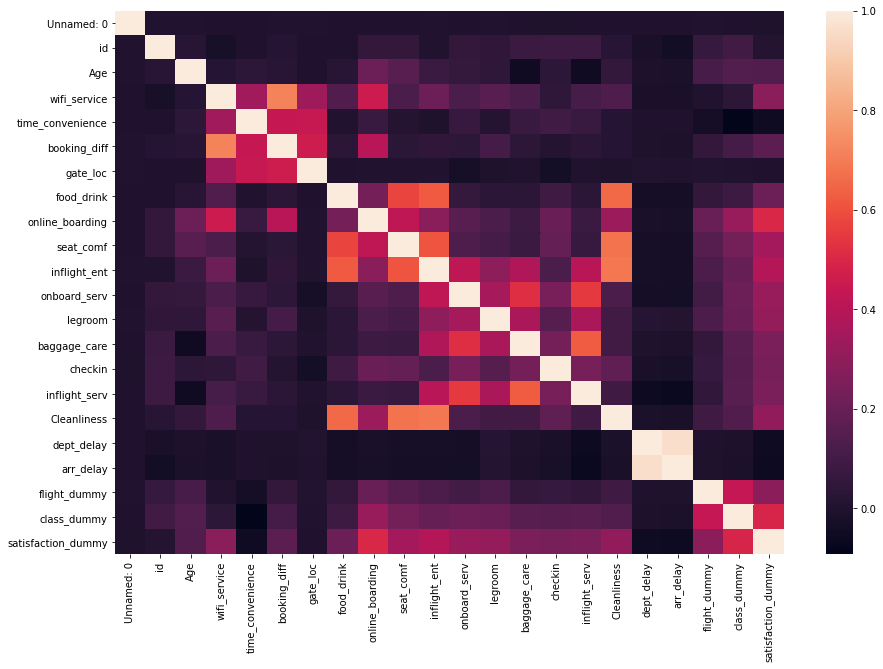

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())


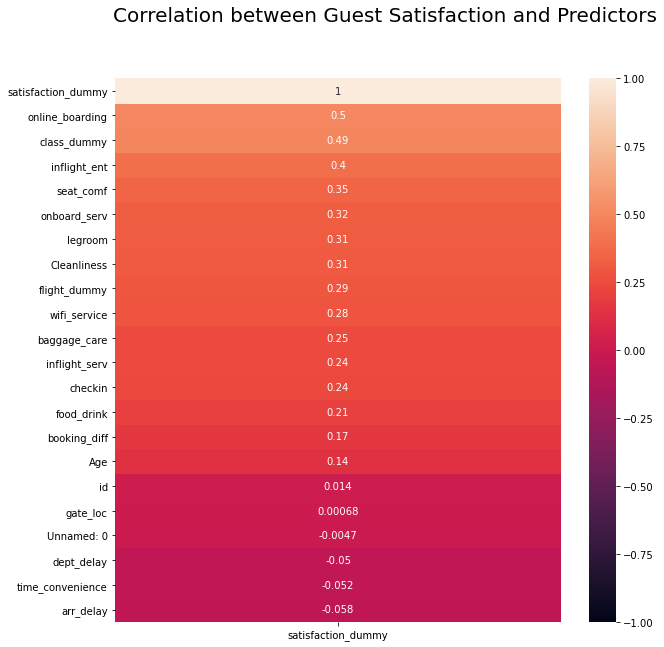

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between Guest Satisfaction and Predictors',fontsize=20)
ax=sns.heatmap(df.corr()[['satisfaction_dummy']].sort_values("satisfaction_dummy"),vmax=1, vmin=-1, cmap="rocket", annot=True, ax=ax);
ax.invert_yaxis()

#### Distribution of highly correlated variables

In [56]:
dfog = pd.read_csv('Desktop/train.csv')

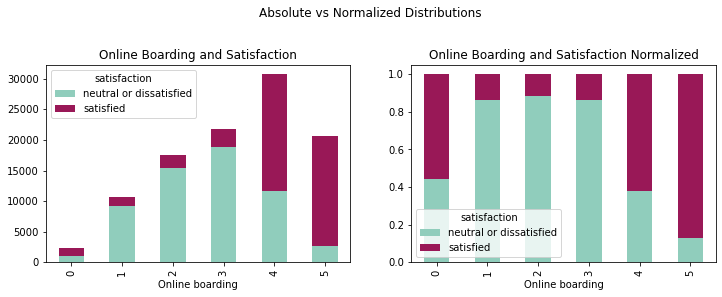

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctonline = pd.crosstab(dfog['Online boarding'], dfog['satisfaction'])
ctonlinenorm = ctonline.div(ctonline.sum(1), axis=0)

plotonline = ctonline.plot(kind='bar', stacked = True, title = 'Online Boarding and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotonlinenorm = ctonlinenorm.plot(kind='bar', stacked = True, title = 'Online Boarding and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

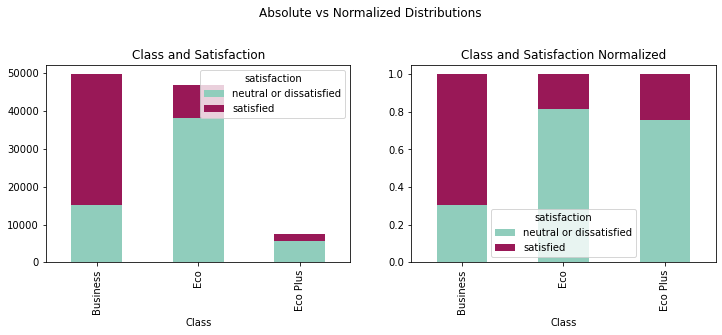

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctclass = pd.crosstab(dfog['Class'], dfog['satisfaction'])
ctclassnorm = ctclass.div(ctclass.sum(1), axis=0)

plotclass = ctclass.plot(kind='bar', stacked = True, title = 'Class and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotclassnorm = ctclassnorm.plot(kind='bar', stacked = True, title = 'Class and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

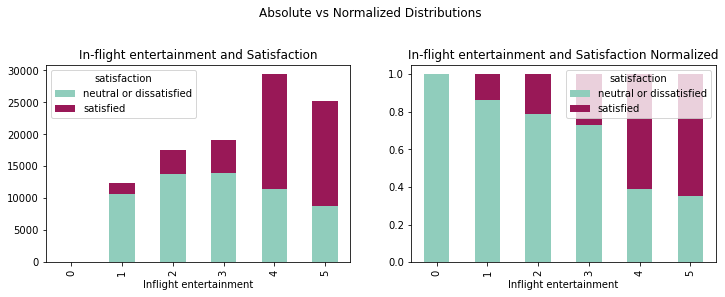

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctentertain = pd.crosstab(dfog['Inflight entertainment'], dfog['satisfaction'])
ctentertainnorm = ctentertain.div(ctentertain.sum(1), axis=0)

plotentertain = ctentertain.plot(kind='bar', stacked = True, title = 'In-flight entertainment and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotentertainnorm = ctentertainnorm.plot(kind='bar', stacked = True, title = 'In-flight entertainment and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

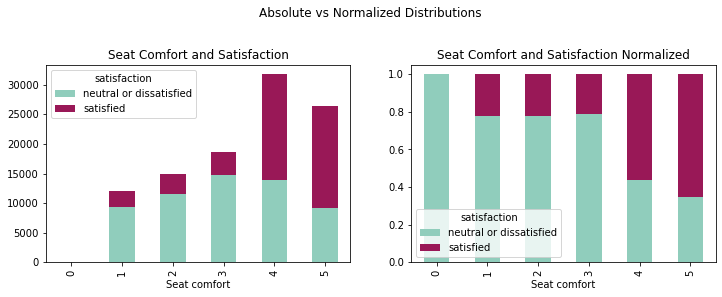

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctseat = pd.crosstab(dfog['Seat comfort'], dfog['satisfaction'])
ctseatnorm = ctseat.div(ctseat.sum(1), axis=0)

plotseat = ctseat.plot(kind='bar', stacked = True, title = 'Seat Comfort and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotseatnorm = ctseatnorm.plot(kind='bar', stacked = True, title = 'Seat Comfort and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

In [81]:
df.columns

Index(['Unnamed: 0', 'id', 'Age', 'wifi_service', 'time_convenience',
       'booking_diff', 'gate_loc', 'food_drink', 'online_boarding',
       'seat_comf', 'inflight_ent', 'onboard_serv', 'legroom', 'baggage_care',
       'checkin', 'inflight_serv', 'Cleanliness', 'dept_delay', 'arr_delay',
       'flight_dummy', 'class_dummy', 'satisfaction_dummy'],
      dtype='object')

<ipython-input-93-1fdf3e5d76a3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


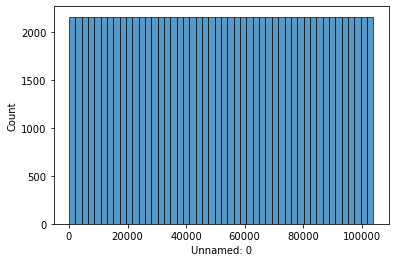

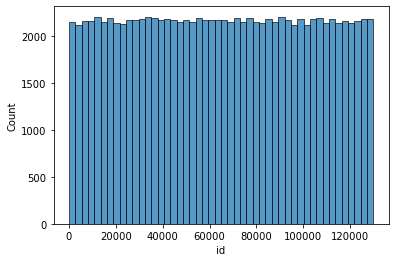

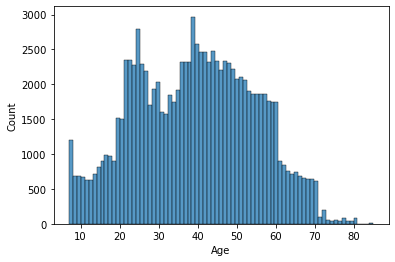

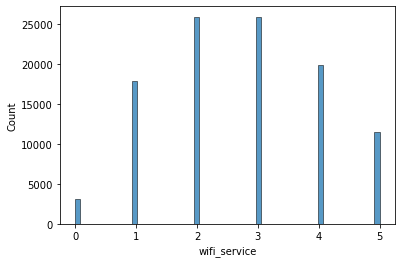

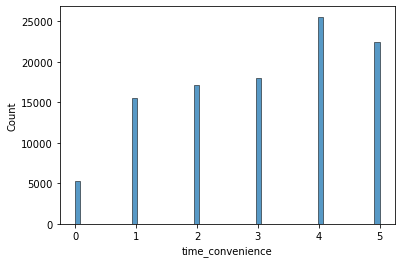

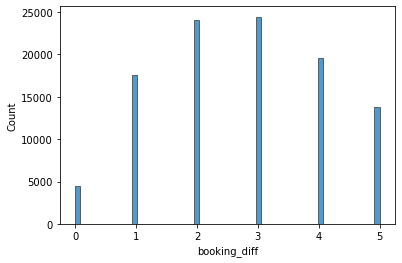

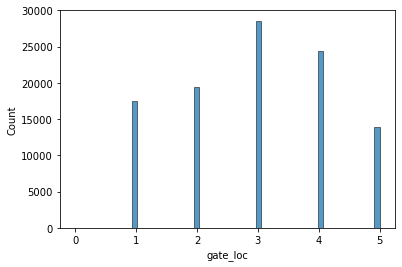

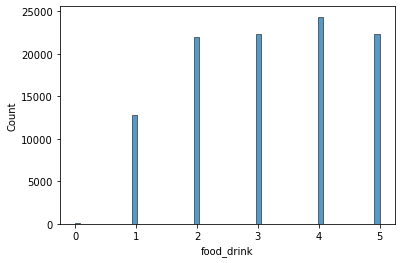

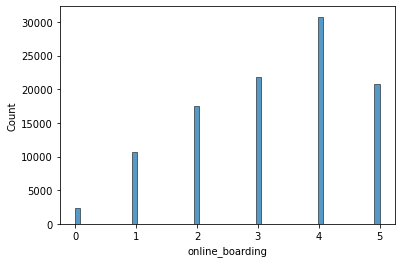

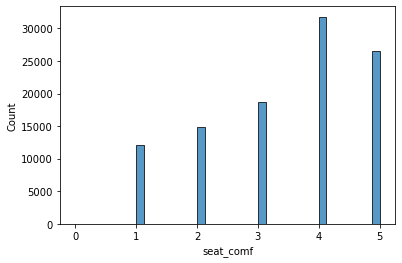

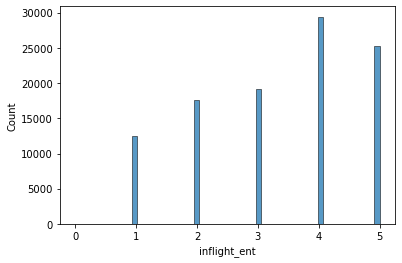

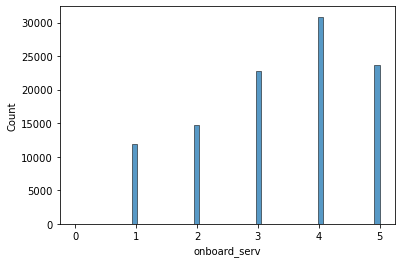

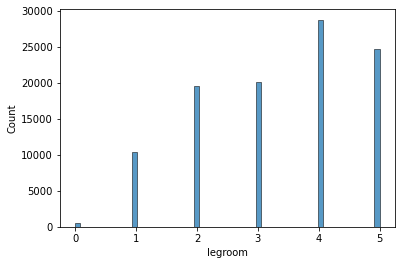

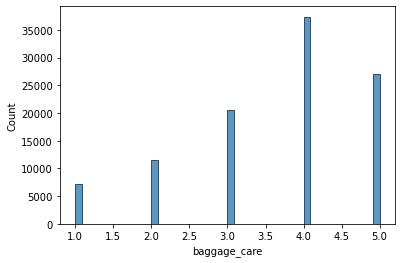

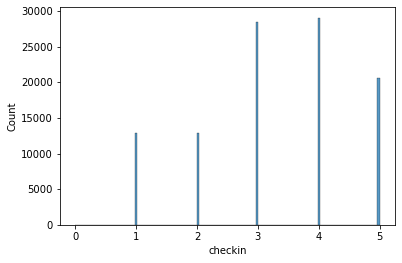

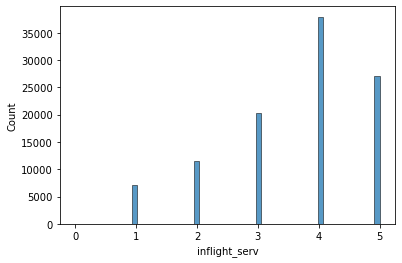

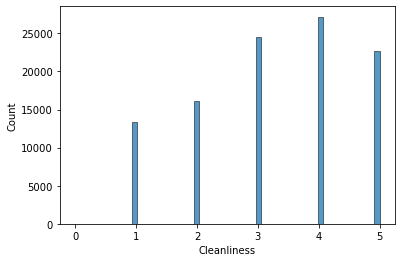

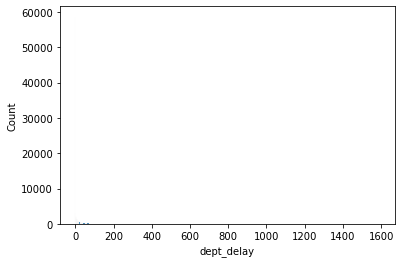

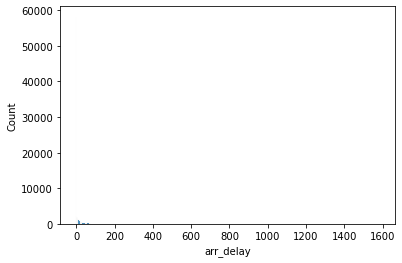

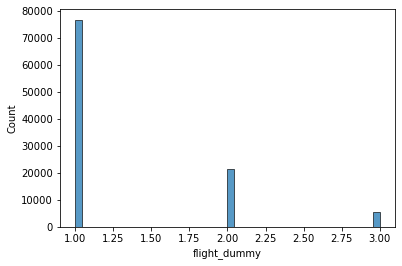

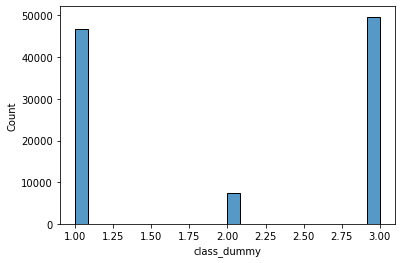

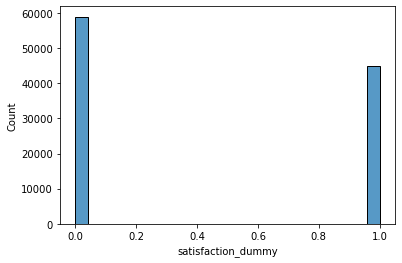

In [93]:
#plot distribution for all columns
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])


In [62]:
predictors = ['Age', 'wifi_service','booking_diff', 'food_drink', 'online_boarding','seat_comf',
              'inflight_ent', 'onboard_serv', 'legroom', 'baggage_care', 'checkin', 'inflight_serv',
              'Cleanliness','flight_dummy', 'class_dummy']
outcome = ['satisfaction_dummy']


In [68]:
#split data into train/test
train_X = df[predictors]
train_y = df[outcome]
valid_X = dftest[predictors]
valid_y = dftest[outcome]

<a id="models"></a>
<br>
# Classification Models

### _Logistic Regression Model_

In [69]:
logit = LogisticRegressionCV(penalty='l2', solver='saga', cv=5, max_iter=110000).fit(train_X, train_y.values.ravel())

In [70]:
logit_confusion = confusionMatrices(logit, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.8434)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       51745        7134
Unsatisfied        9139       35886
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8382)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       12722        1851
Unsatisfied        2353        9050


### _Decision Tree_

In [71]:
dtree = DecisionTreeClassifier().fit(train_X, train_y)
tree_confusion = confusionMatrices(dtree, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58878           1
Unsatisfied          43       44982
Decision Tree - validation results
Confusion Matrix (Accuracy 0.9264)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13582         991
Unsatisfied         920       10483


In [72]:
rf = RandomForestClassifier(n_estimators=100).fit(train_X, train_y.values.ravel())

In [73]:
forest_confusion = confusionMatrices(rf, 'Random Forest')

Random Forest - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58861          18
Unsatisfied          28       44997
Random Forest - validation results
Confusion Matrix (Accuracy 0.9478)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       14055         518
Unsatisfied         837       10566


### K-NN

In [74]:
results = []
values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
for k in values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })
results = pd.DataFrame(results)
results

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed 

,k,accuracy
0,1,0.898945
1,3,0.908646
2,5,0.910956
3,7,0.910725
4,9,0.909147
5,11,0.909493
6,13,0.908300
7,15,0.909070
8,17,0.906375


In [75]:
knn = KNeighborsClassifier(n_neighbors=7).fit(train_X, train_y)
knn_confusion = confusionMatrices(knn, 'k-NN Model')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k-NN Model - training results
Confusion Matrix (Accuracy 0.9295)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       56784        2095
Unsatisfied        5226       39799
k-NN Model - validation results
Confusion Matrix (Accuracy 0.9107)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13871         702
Unsatisfied        1617        9786


### Bagging 

In [76]:
# we use the classification tree as the base estimator
bagging = BaggingClassifier(dtree, max_samples = 0.5, max_features = 0.5)
bagging.fit(train_X, train_y)
bag_confusion = confusionMatrices(bagging, 'Bagging')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Bagging - training results
Confusion Matrix (Accuracy 0.9672)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       57512        1367
Unsatisfied        2039       42986
Bagging - validation results
Confusion Matrix (Accuracy 0.9238)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13686         887
Unsatisfied        1092       10311


### Adaboost 

In [77]:
adaboost = AdaBoostClassifier(n_estimators = 100, base_estimator = dtree)
adaboost.fit(train_X, train_y)
ada_confusion = confusionMatrices(adaboost, 'Adaboost')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Adaboost - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58878           1
Unsatisfied          43       44982
Adaboost - validation results
Confusion Matrix (Accuracy 0.9404)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13931         642
Unsatisfied         906       10497


### Linear Discriminant Analysis

In [78]:
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(train_X, train_y)
ldaConfusion = confusionMatrices(ldaModel, 'Linear Discriminant Analysis')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Linear Discriminant Analysis - training results
Confusion Matrix (Accuracy 0.8387)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       51290        7589
Unsatisfied        9175       35850
Linear Discriminant Analysis - validation results
Confusion Matrix (Accuracy 0.8334)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       12600        1973
Unsatisfied        2354        9049


### Neural Network

In [96]:
scaleInput = MinMaxScaler()
scaleInput.fit(train_X * 1.0)

neuralNet = MLPClassifier(hidden_layer_sizes = (10),
                         activation = 'logistic',
                         solver = 'lbfgs',
                         max_iter = 3000,
                         random_state = 1)

neuralNet.fit(train_X, train_y)
NNConfusion = confusionMatrices(neuralNet, 'Neural Network')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Neural Network - training results
Confusion Matrix (Accuracy 0.8762)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       54366        4513
Unsatisfied        8353       36672
Neural Network - validation results
Confusion Matrix (Accuracy 0.8741)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13438        1135
Unsatisfied        2136        9267


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [80]:
scaleInput = MinMaxScaler()
scaleInput.fit(train_X * 1.0)

neuralNet = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', solver='lbfgs', max_iter=3000, 
                          random_state=1)
neuralNet.fit(scaleInput.transform(train_X), train_y)

print('Neural Network - training results')
classificationSummary(train_y, neuralNet.predict(scaleInput.transform(train_X)))
print('Neural Network - validation results')
classificationSummary(valid_y, neuralNet.predict(scaleInput.transform(valid_X)))

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Neural Network - training results
Confusion Matrix (Accuracy 0.9134)

       Prediction
Actual     0     1
     0 54867  4012
     1  4987 40038
Neural Network - validation results
Confusion Matrix (Accuracy 0.9121)

       Prediction
Actual     0     1
     0 13532  1041
     1  1242 10161


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<a id="results"></a>
<br>
# Results

In [104]:
#Decision Tree
dtree_pred_test = dtree.predict(valid_X)
print(accuracy_score(valid_y,dtree_pred_test))
dtree_roc = metrics.roc_curve(valid_y, dtree_pred_test)
dtree_auc = metrics.auc(dtree_roc[0], dtree_roc[1])
dtree_plot = metrics.RocCurveDisplay(dtree_roc[0], dtree_roc[1],
roc_auc=dtree_auc, estimator_name='Decision Tree')

0.9264320911610717


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.06800247 1.        ], tpr=[0.         0.91931948 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [106]:
#Logistic Regression
logit_pred_test = logit.predict(valid_X)
print(accuracy_score(valid_y,logit_pred_test))
logit_roc = metrics.roc_curve(valid_y, logit_pred_test)
logit_auc = metrics.auc(logit_roc[0], logit_roc[1])
logit_plot = metrics.RocCurveDisplay(logit_roc[0], logit_roc[1],
roc_auc=logit_auc, estimator_name='Logistic Regression')

0.8381582999692023


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.12701571 1.        ], tpr=[0.         0.79365079 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [107]:
#Random Forest
rf_pred_test = rf.predict(valid_X)
print(accuracy_score(valid_y,rf_pred_test))
rf_roc = metrics.roc_curve(valid_y, rf_pred_test)
rf_auc = metrics.auc(rf_roc[0], rf_roc[1])
rf_plot = metrics.RocCurveDisplay(rf_roc[0], logit_roc[1],
roc_auc=rf_auc, estimator_name='Random Forest')

0.9478364644287034


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.03554519 1.        ], tpr=[0.         0.79365079 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [108]:
#Knn
knn_pred_test = knn.predict(valid_X)
print(accuracy_score(valid_y,knn_pred_test))
knn_roc = metrics.roc_curve(valid_y, knn_pred_test)
knn_auc = metrics.auc(knn_roc[0], knn_roc[1])
knn_plot = metrics.RocCurveDisplay(knn_roc[0], knn_roc[1],
roc_auc=knn_auc, estimator_name='k-Nearest Neighbors')

0.9107252848783493


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.04817128 1.        ], tpr=[0.         0.85819521 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [109]:
#Bagging
bagging_pred_test = bagging.predict(valid_X)
print(accuracy_score(valid_y,bagging_pred_test))
bagging_roc = metrics.roc_curve(valid_y, bagging_pred_test)
bagging_auc = metrics.auc(bagging_roc[0], bagging_roc[1])
bagging_plot = metrics.RocCurveDisplay(bagging_roc[0], bagging_roc[1],
roc_auc=bagging_auc, estimator_name='Bagging')

0.9238142901139513


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.06086599 1.        ], tpr=[0.         0.90423573 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [110]:
#Adaboost
adaboost_pred_test = adaboost.predict(valid_X)
print(accuracy_score(valid_y,adaboost_pred_test))
adaboost_roc = metrics.roc_curve(valid_y, adaboost_pred_test)
adaboost_auc = metrics.auc(adaboost_roc[0], adaboost_roc[1])
adaboost_plot = metrics.RocCurveDisplay(adaboost_roc[0], adaboost_roc[1],
roc_auc=adaboost_auc, estimator_name='Adaboost')

0.9404065291037881


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.04405407 1.        ], tpr=[0.         0.92054722 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [111]:
#Linear Discriminant Analysis
ldaModel_pred_test = ldaModel.predict(valid_X)
print(accuracy_score(valid_y,ldaModel_pred_test))
ldaModel_roc = metrics.roc_curve(valid_y, ldaModel_pred_test)
ldaModel_auc = metrics.auc(ldaModel_roc[0], ldaModel_roc[1])
ldaModel_plot = metrics.RocCurveDisplay(ldaModel_roc[0], ldaModel_roc[1],
roc_auc=ldaModel_auc, estimator_name='Linear Discriminant Analysis')

0.8334231598398522


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.13538736 1.        ], tpr=[0.        0.7935631 1.       ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [112]:
#Neural Network
neuralNet_pred_test = neuralNet.predict(valid_X)
print(accuracy_score(valid_y,neuralNet_pred_test))
neuralNet_roc = metrics.roc_curve(valid_y, neuralNet_pred_test)
neuralNet_auc = metrics.auc(ldaModel_roc[0], neuralNet_roc[1])
neuralNet_plot = metrics.RocCurveDisplay(neuralNet_roc[0], neuralNet_roc[1],
roc_auc=neuralNet_auc, estimator_name='Artificial Neural Network')

0.8740760702186634


/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.07788376 1.        ], tpr=[0.         0.81268087 1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


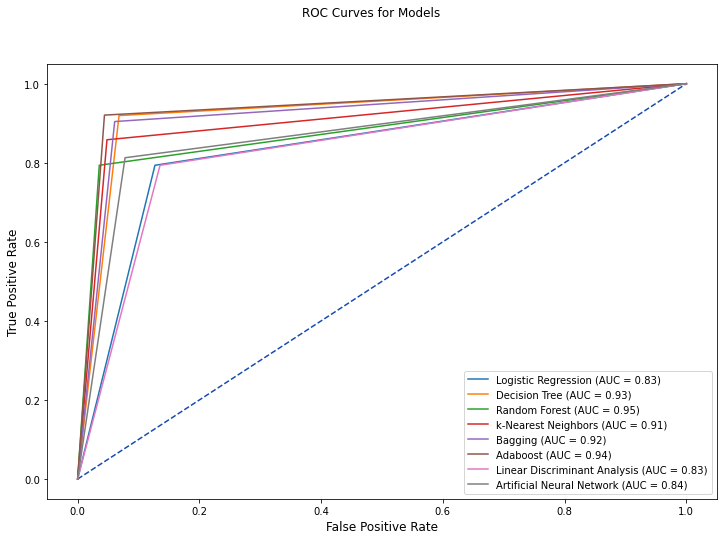

In [114]:
# Plotting ROC Curves for models
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('ROC Curves for Models', fontsize=12)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.xlabel('',fontsize=12)
plt.ylabel('',fontsize=12)

logit_plot.plot(ax)
dtree_plot.plot(ax)
rf_plot.plot(ax)
knn_plot.plot(ax)
bagging_plot.plot(ax)
adaboost_plot.plot(ax)
ldaModel_plot.plot(ax)
neuralNet_plot.plot(ax)
plt.show()

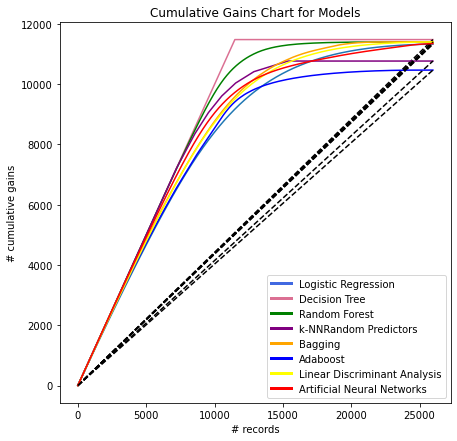

In [118]:
from dmba import liftChart
logisticchart = pd.Series(logit.predict_proba(valid_X)[:, 1])
logisticchart = logisticchart.sort_values(ascending=False)
dtreechart = pd.Series(dtree.predict_proba(valid_X)[:, 1])
dtreechart = dtreechart.sort_values(ascending=False)
rfchart = pd.Series(rf.predict_proba(valid_X)[:, 1])
rfchart = rfchart.sort_values(ascending=False)
knnchart = pd.Series(knn.predict_proba(valid_X)[:, 1])
knnchart = knnchart.sort_values(ascending=False)
baggingchart = pd.Series(bagging.predict_proba(valid_X)[:, 1])
baggingchart = baggingchart.sort_values(ascending=False)
adaboostchart = pd.Series(adaboost.predict_proba(valid_X)[:, 1])
adaboostchart = adaboostchart.sort_values(ascending=False)
ldaModelchart = pd.Series(ldaModel.predict_proba(valid_X)[:, 1])
ldaModelchart = ldaModelchart.sort_values(ascending=False)
neuralNetchart = pd.Series(neuralNet.predict_proba(valid_X)[:, 1])
neuralNetchart = neuralNetchart.sort_values(ascending=False)

ax= gainsChart(logisticchart, figsize=[7,7])
gainsChart(dtreechart, color='palevioletred', ax=ax)
gainsChart(rfchart, color='green', ax=ax)
gainsChart(knnchart, color='purple', ax=ax)
gainsChart(baggingchart, color='orange', ax=ax)
gainsChart(adaboostchart, color='blue', ax=ax)
gainsChart(ldaModelchart, color='yellow', ax=ax)
gainsChart(neuralNetchart, color='red', ax=ax)

ax.set_title('Cumulative Gains Chart for Models')
colors = ['royalblue', 'palevioletred', 'green', 'purple', 'orange', 'blue', 'yellow', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels=['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN'
        'Random Predictors', 'Bagging', 'Adaboost', 'Linear Discriminant Analysis', 'Artificial Neural Networks']
plt.legend(lines, labels)